https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

In [3]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, NUM_WORDS)

In [4]:
train_data.shape

(25000, 10000)

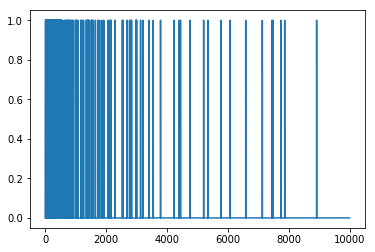

In [5]:
plt.plot(train_data[10])

In [6]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
baseline_model.compile(optimizer='adam', loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history = baseline_model.fit(train_data, train_labels, epochs = 20,
                                     batch_size=512, validation_data=(test_data,test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5033 - acc: 0.8075 - binary_crossentropy: 0.5033 - val_loss: 0.3592 - val_acc: 0.8720 - val_binary_crossentropy: 0.3592
Epoch 2/20
 - 3s - loss: 0.2652 - acc: 0.9077 - binary_crossentropy: 0.2652 - val_loss: 0.2874 - val_acc: 0.8885 - val_binary_crossentropy: 0.2874
Epoch 3/20
 - 3s - loss: 0.1934 - acc: 0.9332 - binary_crossentropy: 0.1934 - val_loss: 0.2858 - val_acc: 0.8865 - val_binary_crossentropy: 0.2858
Epoch 4/20
 - 3s - loss: 0.1534 - acc: 0.9480 - binary_crossentropy: 0.1534 - val_loss: 0.3023 - val_acc: 0.8821 - val_binary_crossentropy: 0.3023
Epoch 5/20
 - 3s - loss: 0.1241 - acc: 0.9595 - binary_crossentropy: 0.1241 - val_loss: 0.3278 - val_acc: 0.8760 - val_binary_crossentropy: 0.3278
Epoch 6/20
 - 3s - loss: 0.1003 - acc: 0.9700 - binary_crossentropy: 0.1003 - val_loss: 0.3537 - val_acc: 0.8740 - val_binary_crossentropy: 0.3537
Epoch 7/20
 - 3s - loss: 0.0806 - acc: 0.9772 - binary_crossentropy:

In [8]:
for i in baseline_history.history:
    print(i)

val_loss
val_acc
val_binary_crossentropy
loss
acc
binary_crossentropy


In [9]:
def plot(history, metric):
	train_metric = history.history[metric]
	val_metric = history.history['val_' + metric]
	epochs = range(1, len(history.epoch)+1)
	plt.plot(epochs, train_metric, 'bo', label='Training ' + metric)
	plt.plot(epochs, val_metric, 'b', label='Validation ' + metric)
	plt.title('Training and Validation ' + metric)
	plt.xlabel('Epochs')
	plt.ylabel(metric)
	plt.legend()
	plt.show()

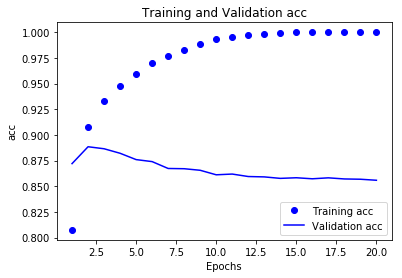

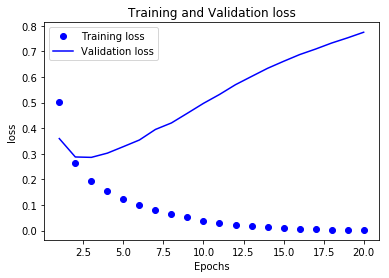

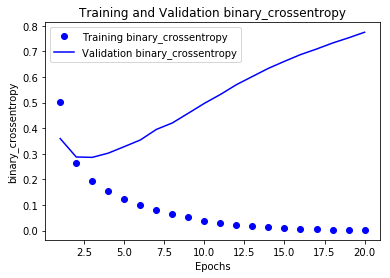

In [10]:
plot(baseline_history, 'acc')
plot(baseline_history, 'loss')
plot(baseline_history, 'binary_crossentropy')

In [11]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [12]:
smaller_history = smaller_model.fit(train_data, train_labels, epochs = 20,
                                     batch_size=512, validation_data=(test_data,test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5834 - acc: 0.7244 - binary_crossentropy: 0.5834 - val_loss: 0.4998 - val_acc: 0.8232 - val_binary_crossentropy: 0.4998
Epoch 2/20
 - 3s - loss: 0.4036 - acc: 0.8850 - binary_crossentropy: 0.4036 - val_loss: 0.3735 - val_acc: 0.8733 - val_binary_crossentropy: 0.3735
Epoch 3/20
 - 3s - loss: 0.2743 - acc: 0.9255 - binary_crossentropy: 0.2743 - val_loss: 0.3082 - val_acc: 0.8872 - val_binary_crossentropy: 0.3082
Epoch 4/20
 - 3s - loss: 0.2105 - acc: 0.9375 - binary_crossentropy: 0.2105 - val_loss: 0.2917 - val_acc: 0.8867 - val_binary_crossentropy: 0.2917
Epoch 5/20
 - 3s - loss: 0.1767 - acc: 0.9478 - binary_crossentropy: 0.1767 - val_loss: 0.2918 - val_acc: 0.8836 - val_binary_crossentropy: 0.2918
Epoch 6/20
 - 3s - loss: 0.1535 - acc: 0.9538 - binary_crossentropy: 0.1535 - val_loss: 0.2969 - val_acc: 0.8832 - val_binary_crossentropy: 0.2969
Epoch 7/20
 - 3s - loss: 0.1359 - acc: 0.9607 - binary_crossentropy:

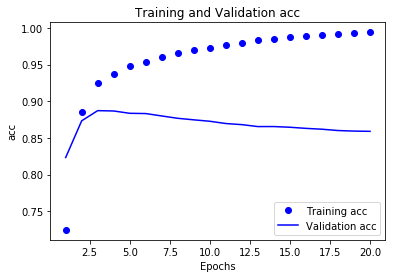

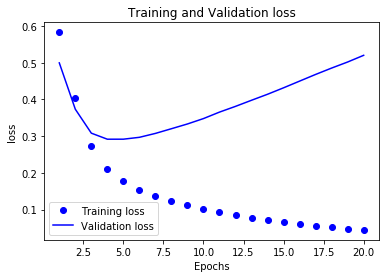

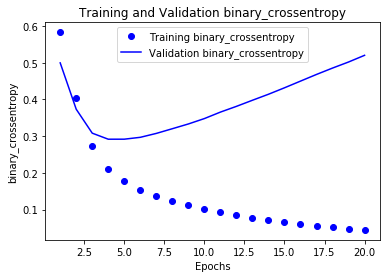

In [21]:
plot(smaller_history, 'acc')
plot(smaller_history, 'loss')
plot(smaller_history, 'binary_crossentropy')

In [14]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [17]:
bigger_history = bigger_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                                  validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 11s - loss: 0.3465 - acc: 0.8496 - binary_crossentropy: 0.3465 - val_loss: 0.2960 - val_acc: 0.8794 - val_binary_crossentropy: 0.2960
Epoch 2/20
 - 11s - loss: 0.1413 - acc: 0.9486 - binary_crossentropy: 0.1413 - val_loss: 0.3494 - val_acc: 0.8671 - val_binary_crossentropy: 0.3494
Epoch 3/20
 - 10s - loss: 0.0483 - acc: 0.9860 - binary_crossentropy: 0.0483 - val_loss: 0.4236 - val_acc: 0.8689 - val_binary_crossentropy: 0.4236
Epoch 4/20
 - 11s - loss: 0.0075 - acc: 0.9992 - binary_crossentropy: 0.0075 - val_loss: 0.5931 - val_acc: 0.8689 - val_binary_crossentropy: 0.5931
Epoch 5/20
 - 10s - loss: 0.0010 - acc: 1.0000 - binary_crossentropy: 0.0010 - val_loss: 0.6642 - val_acc: 0.8697 - val_binary_crossentropy: 0.6642
Epoch 6/20
 - 10s - loss: 2.6529e-04 - acc: 1.0000 - binary_crossentropy: 2.6529e-04 - val_loss: 0.7053 - val_acc: 0.8698 - val_binary_crossentropy: 0.7053
Epoch 7/20
 - 10s - loss: 1.5652e-04 - acc: 1.0000 - b

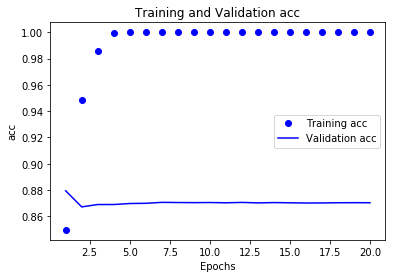

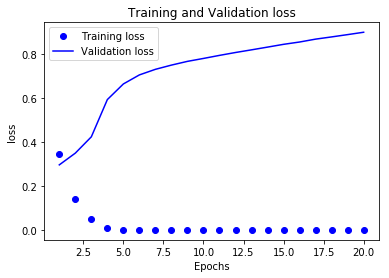

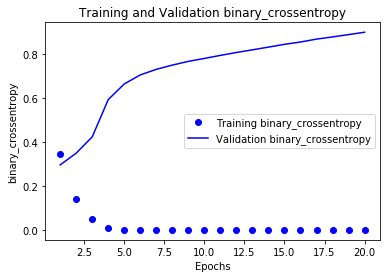

In [22]:
plot(bigger_history, 'acc')
plot(bigger_history, 'loss')
plot(bigger_history, 'binary_crossentropy')

In [39]:
def print_history(histories, metric='loss'):

    epochs = range(1, 21)

    plt.figure(figsize=(10,5))

    for name, history in histories:
        train_metric = history.history[metric]
        val_metric = history.history['val_' + metric]
        val = plt.plot(epochs, train_metric, '--', label=name + ' training ' + metric)
        plt.plot(epochs, val_metric, color=val[0].get_color(), label=name + ' validation ' + metric)

    plt.title('Training and Validation ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

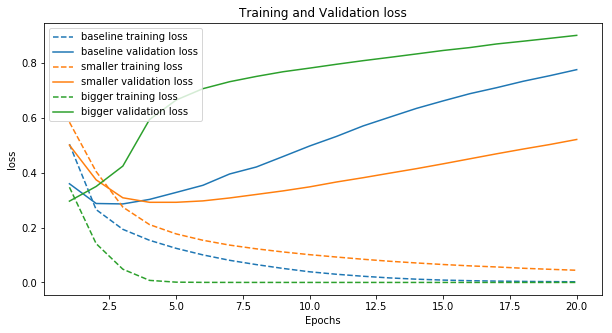

In [40]:
print_history([('baseline', baseline_history),
                ('smaller', smaller_history),
                ('bigger', bigger_history)])

In [37]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

l2_history = l2_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                         validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5437 - acc: 0.8057 - binary_crossentropy: 0.5080 - val_loss: 0.3928 - val_acc: 0.8731 - val_binary_crossentropy: 0.3563
Epoch 2/20
 - 3s - loss: 0.3119 - acc: 0.9066 - binary_crossentropy: 0.2709 - val_loss: 0.3323 - val_acc: 0.8869 - val_binary_crossentropy: 0.2877
Epoch 3/20
 - 3s - loss: 0.2556 - acc: 0.9271 - binary_crossentropy: 0.2084 - val_loss: 0.3319 - val_acc: 0.8861 - val_binary_crossentropy: 0.2827
Epoch 4/20
 - 3s - loss: 0.2290 - acc: 0.9389 - binary_crossentropy: 0.1781 - val_loss: 0.3411 - val_acc: 0.8849 - val_binary_crossentropy: 0.2889
Epoch 5/20
 - 3s - loss: 0.2140 - acc: 0.9453 - binary_crossentropy: 0.1602 - val_loss: 0.3566 - val_acc: 0.8798 - val_binary_crossentropy: 0.3017
Epoch 6/20
 - 3s - loss: 0.2009 - acc: 0.9516 - binary_crossentropy: 0.1453 - val_loss: 0.3701 - val_acc: 0.8770 - val_binary_crossentropy: 0.3139
Epoch 7/20
 - 3s - loss: 0.1935 - acc: 0.9551 - binary_crossentropy:

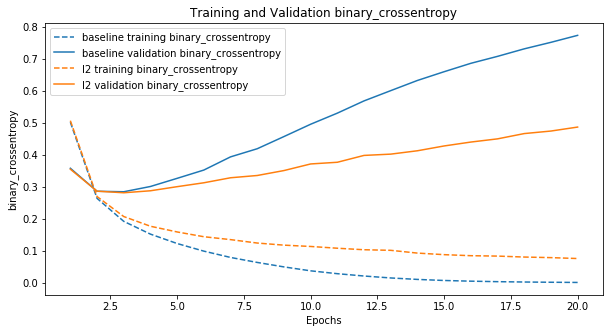

In [43]:
print_history([('baseline', baseline_history),
                ('l2', l2_history)], 'binary_crossentropy')

In [49]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

dpt_history = dpt_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                         validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6030 - acc: 0.6676 - binary_crossentropy: 0.6030 - val_loss: 0.4409 - val_acc: 0.8594 - val_binary_crossentropy: 0.4409
Epoch 2/20
 - 3s - loss: 0.4210 - acc: 0.8266 - binary_crossentropy: 0.4210 - val_loss: 0.3205 - val_acc: 0.8829 - val_binary_crossentropy: 0.3205
Epoch 3/20
 - 3s - loss: 0.3303 - acc: 0.8757 - binary_crossentropy: 0.3303 - val_loss: 0.2836 - val_acc: 0.8863 - val_binary_crossentropy: 0.2836
Epoch 4/20
 - 3s - loss: 0.2750 - acc: 0.9002 - binary_crossentropy: 0.2750 - val_loss: 0.2754 - val_acc: 0.8882 - val_binary_crossentropy: 0.2754
Epoch 5/20
 - 3s - loss: 0.2306 - acc: 0.9181 - binary_crossentropy: 0.2306 - val_loss: 0.2787 - val_acc: 0.8864 - val_binary_crossentropy: 0.2787
Epoch 6/20
 - 3s - loss: 0.2053 - acc: 0.9273 - binary_crossentropy: 0.2053 - val_loss: 0.2922 - val_acc: 0.8866 - val_binary_crossentropy: 0.2922
Epoch 7/20
 - 3s - loss: 0.1776 - acc: 0.9370 - binary_crossentropy:

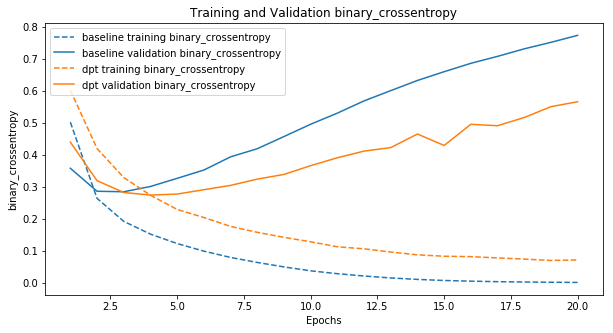

In [50]:
print_history([('baseline', baseline_history),
                ('dpt', dpt_history)], 'binary_crossentropy')